In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, StackingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from regressors import stats
from scipy.stats import kurtosis, skew, boxcox
from sklearn.kernel_ridge import KernelRidge

In [2]:
train = pd.read_csv('train.csv',index_col='Id')
test = pd.read_csv('test.csv',index_col='Id')

# Missing Values

In [3]:
na_counts_train = train.isnull().sum()
na_counts_train[na_counts_train != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [4]:
na_counts_test = test.isnull().sum()
na_counts_test[na_counts_test != 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [5]:
class DataCleaner:
    
    def __init__(self, train, test):
        self.train = train.copy()
        self.test = test.copy()
        
    
    def cleanAlley(self):
        self.train.loc[:,'Alley'] = self.train['Alley'].fillna('No_Alley_Access')
        self.test.loc[:,'Alley'] = self.test['Alley'].fillna('No_Alley_Access')
    
    
    def cleanBsmt(self):
        self.cleanBsmtQual()
        self.cleanBsmtCond()
        self.cleanBsmtExposure()
        self.cleanBsmtFinType1()
        self.cleanBsmtFinType2()
        self.cleanBsmtFinSF1()
        self.cleanBsmtFinSF2()
        self.cleanBsmtUnfSF()
        self.cleanTotalBsmtSF()
        self.cleanBsmtFullBath()
        self.cleanBsmtHalfBath()
    
    def cleanBsmtQual(self):
        self.train.loc[:,'BsmtQual'] = self.train['BsmtQual'].fillna('No_Basement')
        self.test.loc[:,'BsmtQual'] = self.test['BsmtQual'].fillna('No_Basement')
        
        
    def cleanBsmtCond(self):
        self.train.loc[:,'BsmtCond'] = self.train['BsmtCond'].fillna('No_Basement')
        self.test.loc[:,'BsmtCond'] = self.test['BsmtCond'].fillna('No_Basement')
        
    
    def cleanBsmtExposure(self):
        self.train.loc[:,'BsmtExposure'] = self.train['BsmtExposure'].fillna('No_Basement')
        self.test.loc[:,'BsmtExposure'] = self.test['BsmtExposure'].fillna('No_Basement')
        
        
    def cleanBsmtFinType1(self):
        self.train.loc[:,'BsmtFinType1'] = self.train['BsmtFinType1'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType1'] = self.test['BsmtFinType1'].fillna('No_Basement')

        
    def cleanBsmtFinType2(self):
        self.train.loc[:,'BsmtFinType2'] = self.train['BsmtFinType2'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType2'] = self.test['BsmtFinType2'].fillna('No_Basement')
        
        
    def cleanBsmtFinSF1(self):

        self.train.loc[:,'BsmtFinSF1'] = self.train['BsmtFinSF1'].fillna(0)
        self.test.loc[:,'BsmtFinSF1'] = self.test['BsmtFinSF1'].fillna(0)

        
    def cleanBsmtFinSF2(self):
        self.train.loc[:,'BsmtFinSF2'] = self.train['BsmtFinSF2'].fillna(0)
        self.test.loc[:,'BsmtFinSF2'] = self.test['BsmtFinSF2'].fillna(0)
        

    def cleanBsmtUnfSF(self):
        self.train.loc[:,'BsmtUnfSF'] = self.train['BsmtUnfSF'].fillna(0)
        self.test.loc[:,'BsmtUnfSF'] = self.test['BsmtUnfSF'].fillna(0)
        
        
    def cleanTotalBsmtSF(self):
        self.train.loc[:,'TotalBsmtSF'] = self.train['TotalBsmtSF'].fillna(0)   
        self.test.loc[:,'TotalBsmtSF'] = self.test['TotalBsmtSF'].fillna(0)
        
        
    def cleanBsmtFullBath(self):
        self.train.loc[:,'BsmtFullBath'] = self.train['BsmtFullBath'].fillna(0)
        self.test.loc[:,'BsmtFullBath'] = self.test['BsmtFullBath'].fillna(0)
        
    def cleanBsmtHalfBath(self):
        self.train.loc[:,'BsmtHalfBath'] = self.train['BsmtHalfBath'].fillna(0)
        self.test.loc[:,'BsmtHalfBath'] = self.test['BsmtHalfBath'].fillna(0)
    
    
    def cleanFireplaceQu(self):
        self.train.loc[:,'FireplaceQu'] = self.train['FireplaceQu'].fillna('No_Fireplace')
        self.test.loc[:,'FireplaceQu'] = self.test['FireplaceQu'].fillna('No_Fireplace')
    
    
    def cleanGarage(self):
        self.cleanGarageType()
        self.cleanGarageYrBlt()
        self.cleanGarageFinish()
        self.cleanGarageQual()
        self.cleanGarageCond()
        self.cleanGarageCars()
        self.cleanGarageArea()
        
        
    def cleanGarageType(self):
        self.train.loc[:,'GarageType'] = self.train['GarageType'].fillna('No_Garage')
        self.test.loc[:,'GarageType'] = self.test['GarageType'].fillna('No_Garage')
        
        
    def cleanGarageYrBlt(self):
        self.train.loc[:,'GarageYrBlt'] = self.train['GarageYrBlt'].fillna(0)
        self.test.loc[:,'GarageYrBlt'] = self.test['GarageYrBlt'].fillna(0)

        
    def cleanGarageFinish(self):
        self.train.loc[:,'GarageFinish'] = self.train['GarageFinish'].fillna('No_Garage')
        self.test.loc[:,'GarageFinish'] = self.test['GarageFinish'].fillna('No_Garage')
        
        
    def cleanGarageQual(self):
        self.train.loc[:,'GarageQual'] = self.train['GarageQual'].fillna('No_Garage')        
        self.test.loc[:,'GarageQual'] = self.test['GarageQual'].fillna('No_Garage')
        
          
    def cleanGarageCond(self):
        self.train.loc[:,'GarageCond'] = self.train['GarageCond'].fillna('No_Garage')        
        self.test.loc[:,'GarageCond'] = self.test['GarageCond'].fillna('No_Garage')
        
        
    def cleanGarageCars(self):
        self.train.loc[:,'GarageCars'] = self.train['GarageCars'].fillna(0)        
        self.test.loc[:,'GarageCars'] = self.test['GarageCars'].fillna(0)
        
        
        
    def cleanGarageArea(self):
        self.train.loc[:,'GarageArea'] = self.train['GarageArea'].fillna(0)        
        self.test.loc[:,'GarageArea'] = self.test['GarageArea'].fillna(0)
        
        
    def cleanPoolQC(self):
        self.train.loc[:,'PoolQC'] = self.train['PoolQC'].fillna('No_Pool')
        self.test.loc[:,'PoolQC'] = self.test['PoolQC'].fillna('No_Pool')
    
    
    def cleanFence(self):
        self.train.loc[:,'Fence'] = self.train['Fence'].fillna('No_Fence')
        self.test.loc[:,'Fence'] = self.test['Fence'].fillna('No_Fence')

    
    def cleanMiscFeature(self):
        self.train.loc[:,'MiscFeature'] = self.train['MiscFeature'].fillna('No_Misc_Feature')
        self.test.loc[:,'MiscFeature'] = self.test['MiscFeature'].fillna('No_Misc_Feature')
        
        
    def cleanMasVnrType(self):
        #self.imputeColumn('MasVnrType')
        self.train.loc[:,'MasVnrType'] = self.train['MasVnrType'].fillna('No_MasVnr')
        self.test.loc[:,'MasVnrType'] = self.test['MasVnrType'].fillna('No_MasVnr')

        
    
    def cleanMasVnrArea(self):
        #self.imputeColumn('MasVnrArea')
        self.train.loc[:,'MasVnrArea'] = self.train['MasVnrArea'].fillna(0)
        self.test.loc[:,'MasVnrArea'] = self.test['MasVnrArea'].fillna(0)
        
        
    def cleanMSSubClass(self):
        self.train.loc[:,'MSSubClass'] = self.train['MSSubClass'].astype('object')
        self.test.loc[:,'MSSubClass'] = self.test['MSSubClass'].astype('object')


    
    def cleanLotFrontage(self):
         self.imputeColumn('LotFrontage')
        
        
    def cleanElectrical(self):
        self.imputeColumn('Electrical')
        
        
    def cleanMSZoning(self):
        self.imputeColumn('MSZoning')
        
    def cleanUtilities(self):
        self.imputeColumn('Utilities')
        
        
    def cleanExterior1st(self):
        self.imputeColumn('Exterior1st')
        
    def cleanExterior2nd(self):
        self.imputeColumn('Exterior2nd')
        
    def cleanKitchenQual(self):
        self.imputeColumn('KitchenQual')
        
        
    def cleanFunctional(self):
        self.imputeColumn('Functional')
        
        
    def cleanSaleType(self):
        self.imputeColumn('SaleType')
        
        
    def imputeColumn(self, colName):
        train, test = self.dummify([colName])
        missing_train = train[train[colName].isnull()]
        train_na = train[train[colName].notnull()]
        missing_test = test[test[colName].isnull()]
        
        isMissingFeatureCol_Train = sum(missing_train.columns[missing_train.isnull().sum() != 0] != colName) == 0
        isMissingFeatureCol_Test = sum(missing_test.columns[missing_test.isnull().sum() != 0] != colName) == 0

        if (isMissingFeatureCol_Train) & (isMissingFeatureCol_Test):
            print('Dropping Rows')
            train_na = train[train[colName].notnull()]
            train_na = train_na.dropna()
            train_na_X = train_na.loc[:,train_na.columns.difference([colName,'SalePrice'])]
            train_na_y = train_na[colName]
            
            missing_train = missing_train.loc[:,missing_train.columns.difference([colName, 'SalePrice'])]
            missing_test = missing_test.loc[:,missing_test.columns.difference([colName, 'SalePrice'])]
             
            rf = self.randomForestImputation(train_na_X, train_na_y, train[colName].dtypes, 2)
                
            
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed  
        else:
            print('DroppingCols')
            colsWithNA = train_na.columns[train_na.isnull().sum() != 0].to_list()
            colsWithNA_Missing = missing_train.columns[missing_train.isnull().sum() != 0].to_list()
            targetCols = [colName,'SalePrice']
            colsToDrop = targetCols + colsWithNA + colsWithNA_Missing

            train_na_X = train_na.loc[:,train_na.columns.difference(colsToDrop)]
            train_na_y = train_na[colName]

            missing_train = missing_train.loc[:,missing_train.columns.difference(colsToDrop)]
            missing_test = missing_test.loc[:,missing_test.columns.difference(colsToDrop)]
            
            rf = self.randomForestImputation(train_na_X, train_na_y, train[colName].dtypes, 2)
        
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed
                
    def randomForestImputation(self, train_X, train_y, forestType, cv):
        
        if forestType == 'object':
            rf = RandomForestClassifier()
            X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_test)
            print(confusion_matrix(predictions, y_test))
            print(accuracy_score(predictions, y_test))
            print(precision_score(predictions, y_test, average='weighted'))
            
        else:
            rf = RandomForestRegressor()
            X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_test)
            print(pd.DataFrame(predictions,y_test))
            print(mean_squared_error(predictions, y_test))
        
        return rf
            
    '''
    def cleanAllColumns(self):
        self.cleanAlley()
        self.cleanBsmt()
        self.cleanElectrical()
        self.cleanFence()
        self.cleanFireplaceQu()
        self.cleanGarage()
        self.cleanMasVnrArea()
        self.cleanMasVnrType()
        self.cleanMiscFeature()
        self.cleanPoolQC()
        self.cleanMSZoning()
        self.cleanUtilities()
        self.cleanExterior1st()
        self.cleanExterior2nd()
        self.cleanKitchenQual()
        self.cleanFunctional()
        self.cleanSaleType()   
    '''

        
    def dummify(self, notCols):
        cat_cols = self.train.dtypes[self.train.dtypes == 'object'].index.to_list()
        
        try:
            for col in notCols:
                cat_cols.remove(col)
        except:
            print('Column not in category cols')
        
        dum_train = pd.DataFrame()
        dum_test = pd.DataFrame()
        dummies_train = []
        dummies_test = []
        for col in cat_cols:
            dum_train = pd.get_dummies(self.train[col], prefix=f'{col}Dummy', drop_first=True)
            dum_test = pd.get_dummies(self.test[col], prefix= f'{col}Dummy', drop_first=True)
            dummies_train.append(dum_train)
            dummies_test.append(dum_test)
            
        
        concat_dummies_train = pd.concat(dummies_train, axis=1)
        train = pd.concat([self.train, concat_dummies_train], axis=1)
        train = train.drop(cat_cols, axis=1)
       
        concat_dummies_test = pd.concat(dummies_test, axis=1)
        test = pd.concat([self.test, concat_dummies_test],axis=1)
        test = test.drop(cat_cols, axis=1)
        
        missingCols = set(train.columns) - set(test.columns)
        for col in missingCols:
            if col != 'SalePrice':
                test[col] = 0
                
        
        missingCols = set(test.columns) - set(train.columns)        
        for col in missingCols:
            train[col] = 0
            

        return [train, test]
    
    
    def ordinalEncode(self, ordCols):

        full = pd.concat([self.train[ordCols], self.test[ordCols]],axis=0)
        
        ordEnc = OrdinalEncoder()
        ordEnc.fit(full)
        self.train[ordCols] = ordEnc.transform(self.train[ordCols])
        self.test[ordCols] = ordEnc.transform(self.test[ordCols])        
        
    def getCategoryColumns(self):
        catColsTrain = self.train.columns[self.train.dtypes == 'object']
        catColsTest = self.test.columns[self.test.dtypes == 'object']
        
        return [catColsTrain, catColsTest]
    
    def getNumericColumns(self):
        numColsTrain = self.train.columns[self.train.dtypes != 'object']
        numColsTest = self.test.columns[self.test.dtypes != 'object']
        
        return [numColsTrain, numColsTest]
        
    
            
            
        
        

In [6]:
cleaned = DataCleaner(train, test)
cleaned.cleanAlley()
cleaned.cleanBsmtQual()
cleaned.cleanBsmtCond()
cleaned.cleanBsmtExposure()
cleaned.cleanBsmtFinType1()
cleaned.cleanBsmtFinType2()
cleaned.cleanBsmtFinSF1()
cleaned.cleanBsmtFinSF2()
cleaned.cleanBsmtUnfSF()
cleaned.cleanMasVnrType()
cleaned.cleanMasVnrArea()
cleaned.cleanTotalBsmtSF()
cleaned.cleanBsmtHalfBath()
cleaned.cleanBsmtFullBath()
cleaned.cleanFireplaceQu()
cleaned.cleanGarageType()
cleaned.cleanGarageYrBlt()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageCond()
cleaned.cleanGarageCars()
cleaned.cleanGarageArea()
cleaned.cleanPoolQC()
cleaned.cleanFence()
cleaned.cleanMiscFeature()
cleaned.cleanMSSubClass()
cleaned.cleanElectrical()
cleaned.cleanMSZoning()
cleaned.cleanUtilities()
cleaned.cleanExterior1st()
cleaned.cleanExterior2nd()
cleaned.cleanKitchenQual()
cleaned.cleanFunctional()
cleaned.cleanSaleType()
cleaned.cleanLotFrontage()

Dropping Rows
[[  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [ 18   5   1 216]]
0.9
1.0
DroppingCols
[[  0   0   0   0   0]
 [  0  11   0   1   0]
 [  0   0   0   0   0]
 [  3   1   0 219   7]
 [  3   0   1   7  39]]
0.9212328767123288
0.9427588269711622
DroppingCols
[[292]]
1.0
1.0
Dropping Rows
[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0]
 [ 0  1  1  1 32  1  0  0  0  1  2]
 [ 1  0  0  1  0 32  0  0  0  0  0]
 [ 0  0  0  0  1  0 10  0  0  2  0]
 [ 0  0  0  0  0  1  0  2  0  1  0]
 [ 0  0  1  0  0  0  0  1 85  0  1]
 [ 3  0  1  0  0  1  1  1  0 31  5]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
0.8796680497925311
0.9357606577741978
Dropping Rows
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 

In [12]:
#cleaned.train.to_csv('train_filled_na.csv')

In [13]:
#cleaned.test.to_csv('test_filled_na.csv')

# EDA

In [7]:
trainCatCols, testCatCols = cleaned.getCategoryColumns()
trainNumCols, testNumCols = cleaned.getNumericColumns()

In [8]:
def getHistograms(cols, data):
    f, axes = plt.subplots(round(len(cols)/2)+1, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
            
        if col == 'GarageYrBlt':
            continue
        #print(rowIdx,colIdx)
        ax = sns.histplot(x=col, data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        data[col].value_counts()
        colIdx += 1
    f.tight_layout()
    
def getBoxplots(cols, data):
    f, axes = plt.subplots(round(len(cols)/2)+1, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        #print(rowIdx,colIdx)
        if col == 'GarageYrBlt':
            continue
        ax = sns.boxplot(x=col, y='SalePrice', data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        data[col].value_counts()
        colIdx += 1
    f.tight_layout()
    
    
def getScatterplots(cols, data):
    f, axes = plt.subplots(round(len(cols)/2)+1, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        if col == 'GarageYrBlt':
            continue
        #print(rowIdx,colIdx)
        ax = sns.scatterplot(x=col, y='SalePrice', data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        colIdx += 1
    f.tight_layout()
    
    
def getValueCounts(cols, data):
    f, axes = plt.subplots(round(len(cols)/2)+1, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        value_counts = data[col].value_counts()
        ax = sns.barplot(x=value_counts.index, y=value_counts, data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        colIdx += 1
    f.tight_layout()
    
    

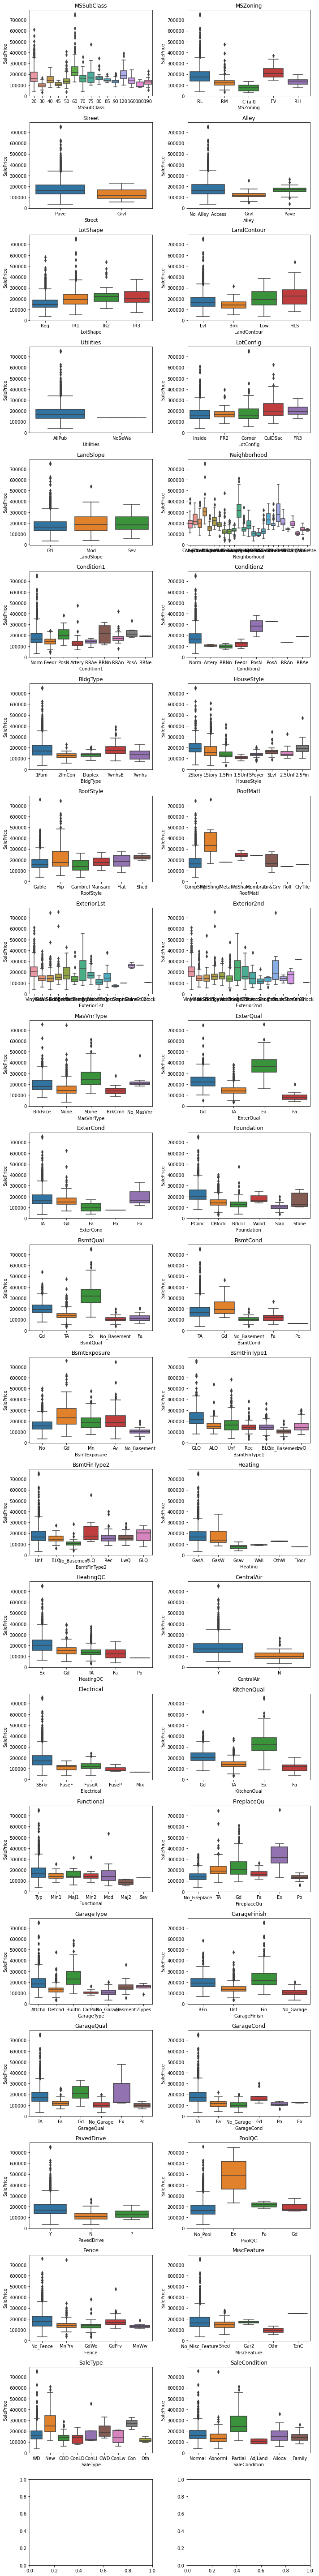

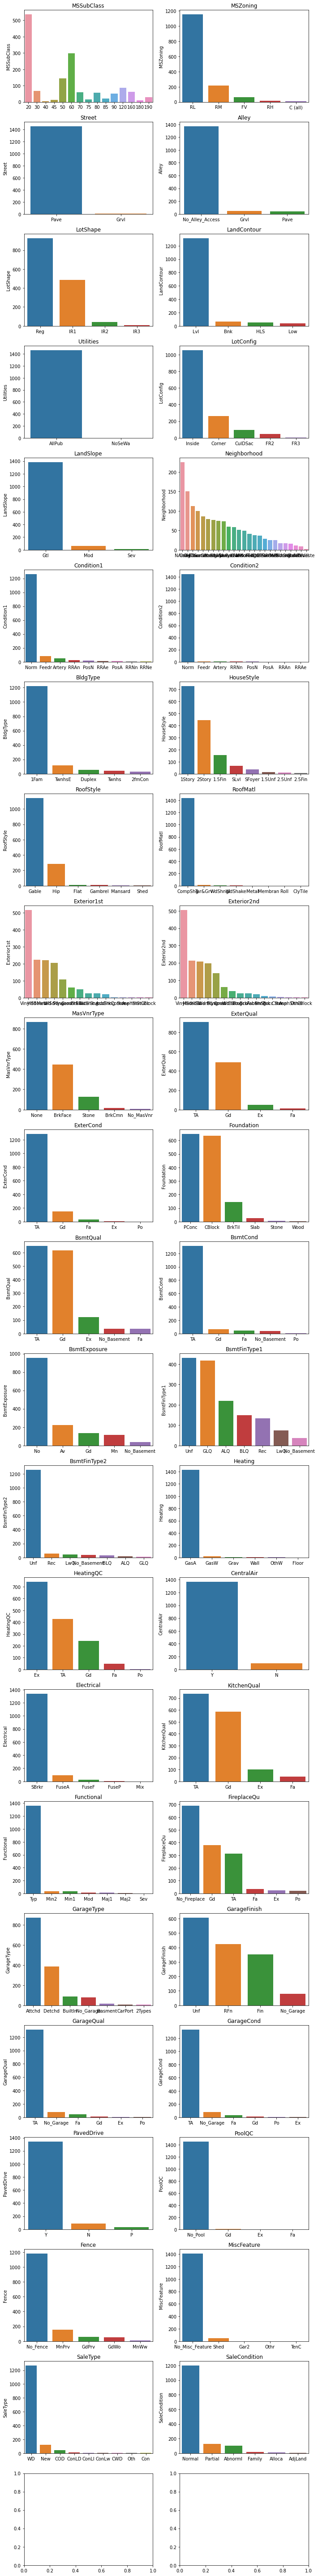

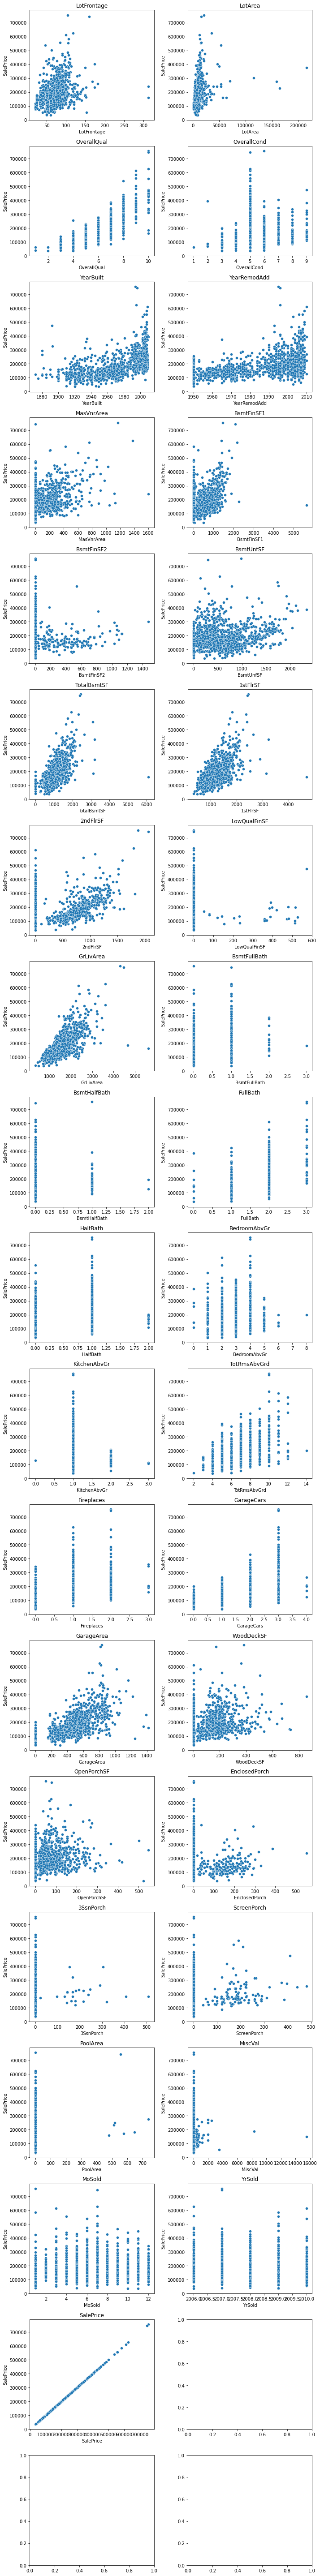

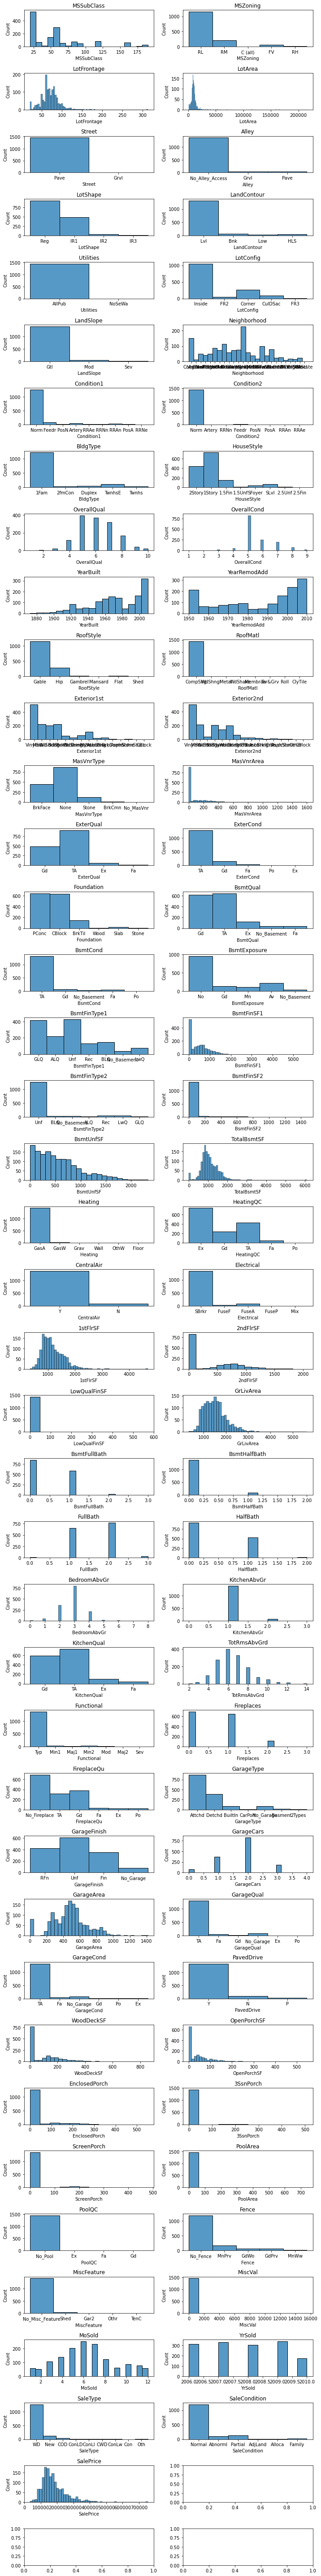

In [9]:
getBoxplots(trainCatCols, cleaned.train)
getValueCounts(trainCatCols, cleaned.train)
getScatterplots(trainNumCols, cleaned.train)
getHistograms(cleaned.train.columns, cleaned.train)


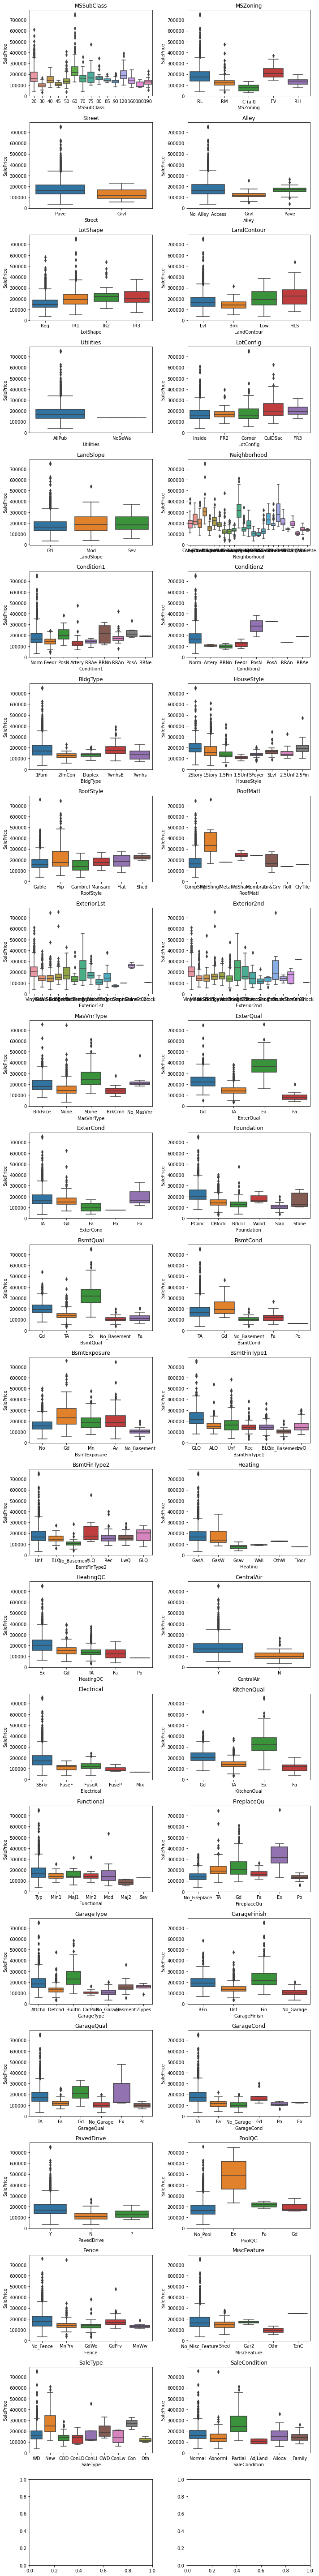

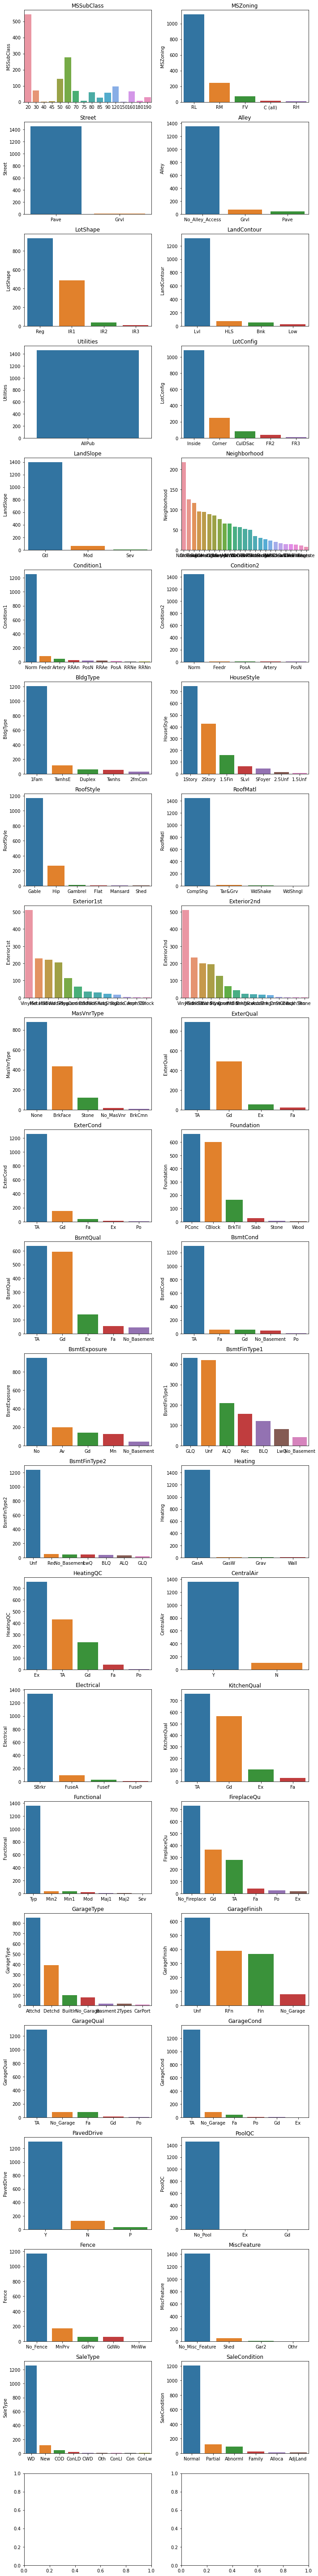

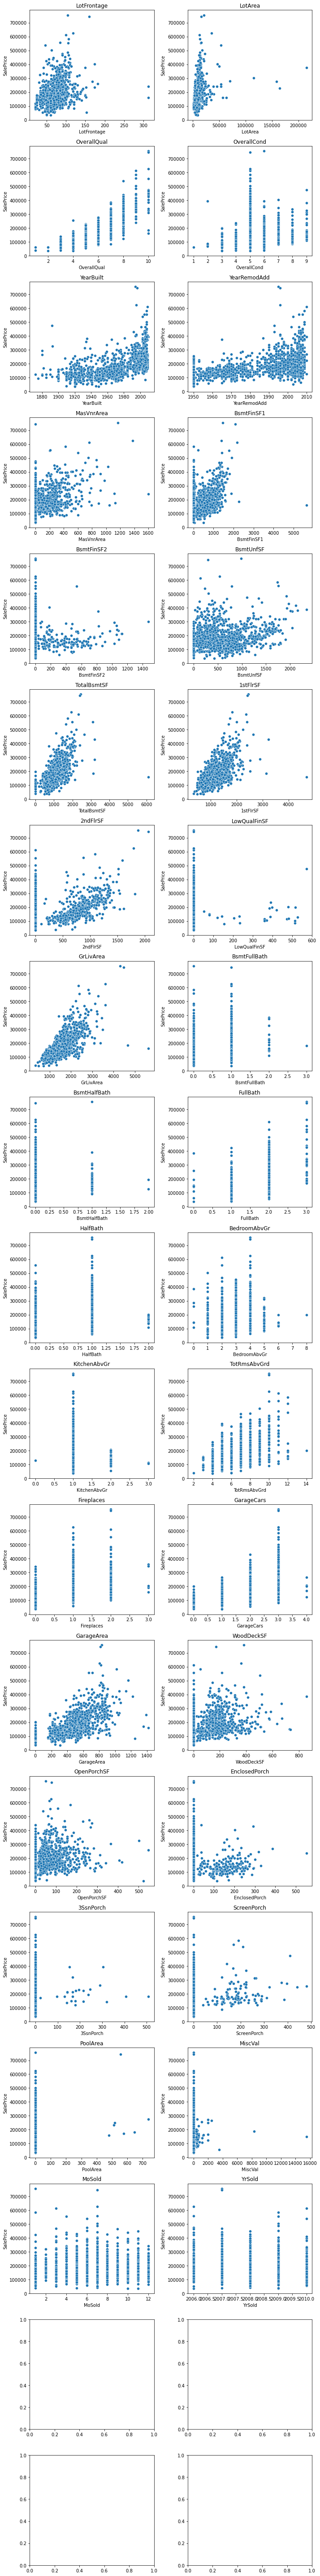

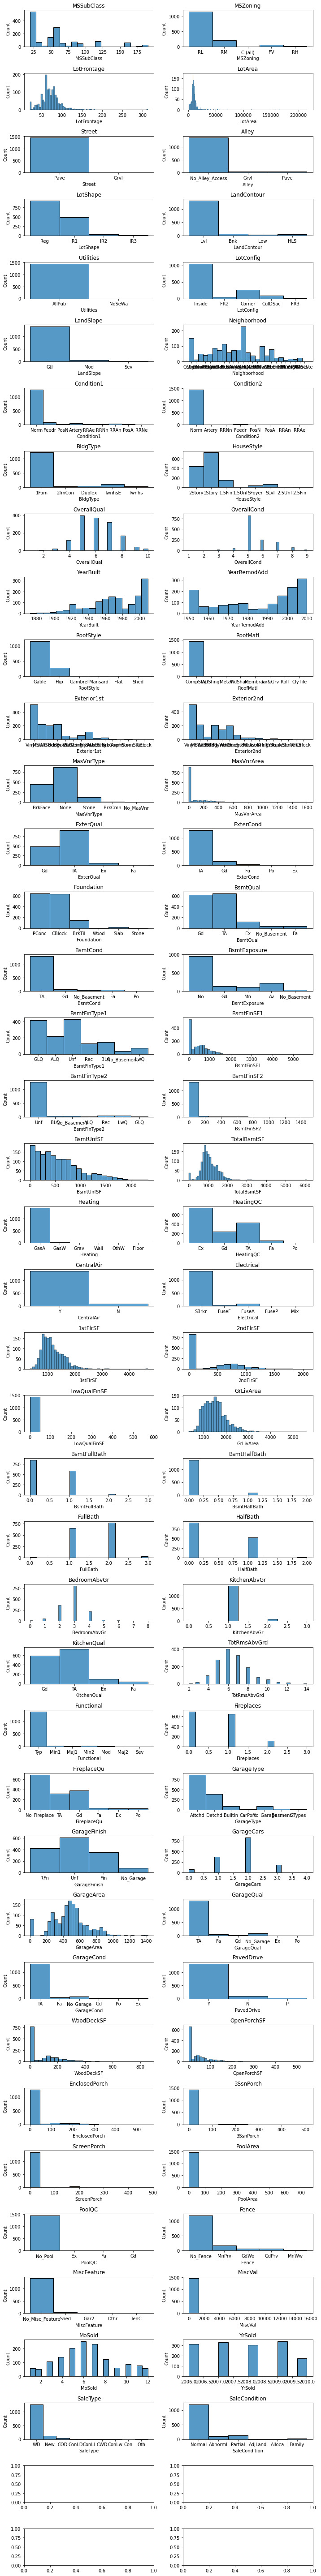

In [10]:
getBoxplots(testCatCols, cleaned.test)
getValueCounts(testCatCols, cleaned.test)
getScatterplots(testNumCols, cleaned.test)
getHistograms(cleaned.test.columns, cleaned.test)

# Detecting Outliers

In [11]:
outliers = []
outliers.append(cleaned.train[cleaned.train['TotalBsmtSF'] > 6000].index.to_list())
outliers.append(cleaned.train[cleaned.train['1stFlrSF'] > 4000].index.to_list())
outliers.append(cleaned.train[(cleaned.train['GrLivArea'] > 4000) & (cleaned.train['SalePrice'] < 300000)].index.to_list())
outliers.append(cleaned.train[cleaned.train['BsmtFinSF1'] > 4000].index.to_list())
outliers.append(cleaned.train[cleaned.train['LotFrontage'] > 300].index.to_list())
outliers.append(cleaned.train[cleaned.train['LotArea'] > 100000].index.to_list())
outliers.append(cleaned.train[(cleaned.train['GarageArea'] > 1200) & (cleaned.train['SalePrice'] < 300000)].index.to_list())
#outliers = np.array(outliers)
outliers = [item for sublist in outliers for item in sublist]
outliers = list(set(outliers))

cleaned.train = cleaned.train[~cleaned.train.index.isin(outliers)]


# Feature Engineering

In [12]:
def addHasGarage(data):
    data['hasGarage'] = data['GarageType'].apply(lambda x: 0 if x=='No_Garage' else 1)

    
def addHasBsmt(data): 
    data['hasBsmt'] = data['BsmtQual'].apply(lambda x: 0 if x=='No_Basement' else 1)
    
def addHasAlley_Access(data): 
    data['hasAlley_Access'] = data['Alley'].apply(lambda x: 0 if x=='No_Alley_Access' else 1)
    
def addHasFireplace(data):
    data['hasFireplace'] = data['FireplaceQu'].apply(lambda x: 0 if x=='No_Fireplace' else 1)
    
def addHasPool(data):
    data['hasPool'] = data['PoolQC'].apply(lambda x: 0 if x=='No_Pool' else 1)

    
def addHasFence(data): 
    data['hasFence'] = data['Fence'].apply(lambda x: 0 if x=='No_Fence' else 1)

    
def addHasMisc_Feature(data):
    data['hasMisc_Feature'] = data['MiscFeature'].apply(lambda x: 0 if x=='No_Misc_Feature' else 1)
    
    
def addHasMasVnr(data):
    data['hasMasVnr'] = data['MasVnrType'].apply(lambda x: 0 if x=='No_MasVnr' else 1)

    
def getNumFloors(row):
    count = 0
    if row['TotalBsmtSF'] != 0:
        count = count + 1
    if row['1stFlrSF'] != 0:
        count = count + 1
    if row['2ndFlrSF'] != 0:
        count = count + 1
    return count


def addGrLivAreaHighQualitySF(data):
    data['GrLivAreaHighQualitySF'] = (data['1stFlrSF'] + data['2ndFlrSF']) - data['LowQualFinSF']
    
def addTotalIndoorSF(data):
    data['TotalIndoorSF'] = data['TotalBsmtSF'] + data['GrLivAreaHighQualitySF'] + data['GarageArea']

def addTotalOutdoorSF(data):
    data['TotalOutdoorSF'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch'] 
    + data['WoodDeckSF'] + data['PoolArea']
    

def addBsmtBaths(data):
    data['BsmtBaths'] = data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])

def addBaths(data):
    data['Baths'] = data['FullBath'] + (0.5 * data['HalfBath'])
    
def addHasBeenRemodeled(data):
    data['hasBeenRemodeled'] = data.apply(lambda x: 0 if x['YearBuilt'] == x['YearRemodAdd'] else 1, axis=1)

    
def plotIndicators(data):
    f, axes = plt.subplots(9,1, figsize=(10,30))
    cols = ['Garage', 'Bsmt', 'Alley_Access','Fireplace', 'Pool', 'Fence', 'Misc_Feature', 'MasVnr', 'BeenRemodeled']

    
    for idx, col in enumerate(cols):
        grouped_garage = data.groupby(f'has{col}').mean().reset_index()
        ax = sns.barplot(grouped_garage[f'has{col}'],grouped_garage['SalePrice'], ax = axes[idx])

    

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

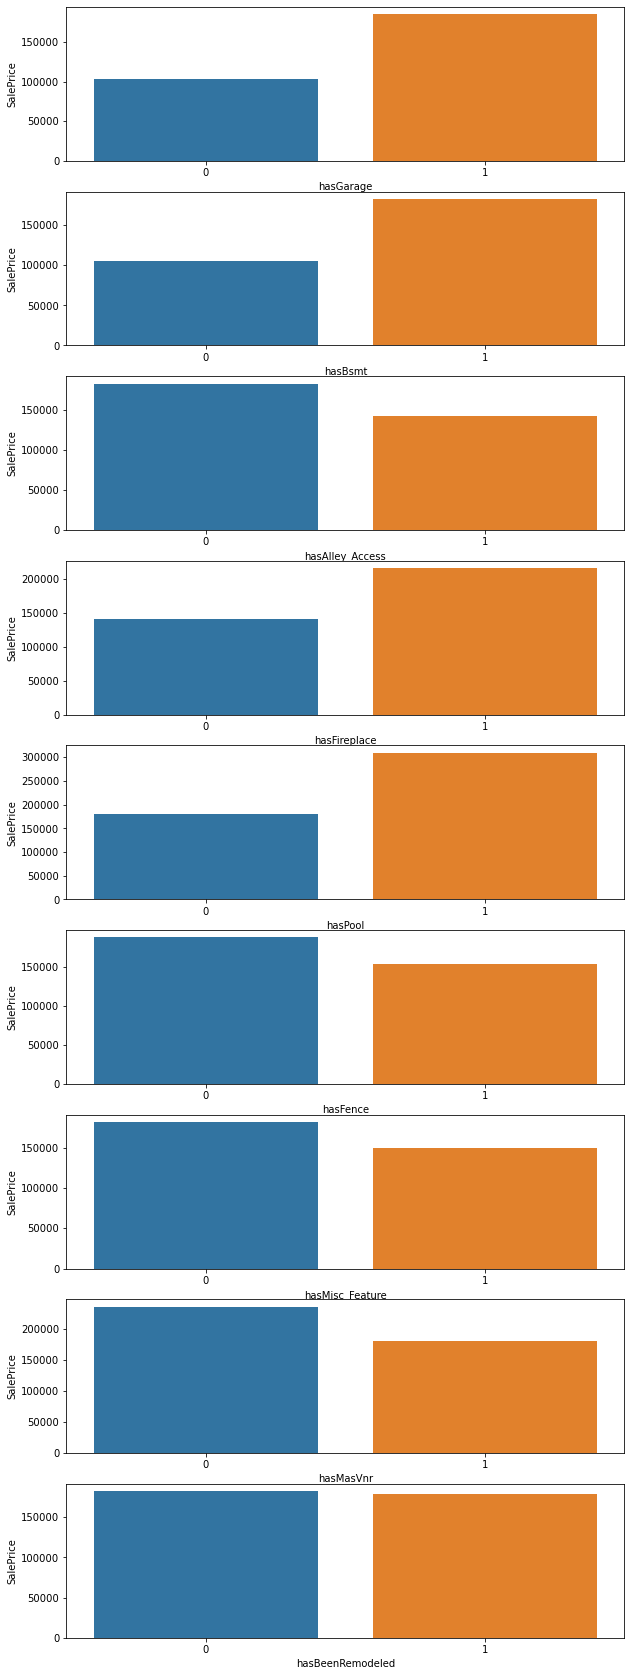

In [13]:
addHasGarage(cleaned.train)
addHasGarage(cleaned.test)

addHasBsmt(cleaned.train)
addHasBsmt(cleaned.test)

addHasAlley_Access(cleaned.train)
addHasAlley_Access(cleaned.test)

addHasFireplace(cleaned.train)
addHasFireplace(cleaned.test)

addHasPool(cleaned.train)
addHasPool(cleaned.test)

addHasFence(cleaned.train)
addHasFence(cleaned.test)

addHasMisc_Feature(cleaned.train)
addHasMisc_Feature(cleaned.test)


addHasMasVnr(cleaned.train)
addHasMasVnr(cleaned.test)


addGrLivAreaHighQualitySF(cleaned.train)
addGrLivAreaHighQualitySF(cleaned.test)


addTotalIndoorSF(cleaned.train)
addTotalIndoorSF(cleaned.test)


addTotalOutdoorSF(cleaned.train)
addTotalOutdoorSF(cleaned.test)


addBsmtBaths(cleaned.train)
addBsmtBaths(cleaned.test)


addBaths(cleaned.train)
addBaths(cleaned.test)


addHasBeenRemodeled(cleaned.train)
addHasBeenRemodeled(cleaned.test)

cleaned.train['NumFloors'] = cleaned.train.apply(getNumFloors, axis=1)
cleaned.test['NumFloors'] = cleaned.test.apply(getNumFloors, axis=1)

plotIndicators(cleaned.train)


# Dropping Columns

In [14]:
colsToDrop = ['PoolArea','MiscVal','MiscFeature','3SsnPorch','LowQualFinSF','Street',
                                    'Condition2','RoofMatl','Heating','PoolQC','Utilities']
def dropCols(data, colsToDrop):
    return data.drop(colsToDrop, axis=1)


cleaned.train = dropCols(cleaned.train, colsToDrop)
cleaned.test = dropCols(cleaned.test, colsToDrop)


In [15]:
# for col in trainNumCols:
#     print(col, '-' ,kurtosis(cleaned.train[col], bias = False, fisher=True))
#     if kurtosis(cleaned.train[col], bias = False, fisher=True) > 5:
#         kurtosis(cleaned.train[col], bias = False, fisher=True)

def logTransform(data, colsToTransform):
    for col in colsToTransform:
        if col == 'TotalBsmtSF':
            data[col] = np.log1p(data[col])**5
        elif col == 'SalePrice':
            try:
                data['SalePrice'] = np.log1p(data['SalePrice'])
            except:
                pass
        else:
            data[col] = np.log1p(data[col])
        



In [16]:
colsToTransform = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
                   '1stFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'OpenPorchSF', 'EnclosedPorch',
                   '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','SalePrice']

colsToTransform = np.setdiff1d(colsToTransform, colsToDrop)

logTransform(cleaned.train, colsToTransform)
logTransform(cleaned.test, colsToTransform)

# Dummify Columns

In [17]:
cleaned.train.columns[cleaned.train.dtypes == 'object']

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
ordCols = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
            'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars','MoSold', 'YrSold','ExterQual','ExterCond',
            'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu',
            'PoolQC','Fence','LandSlope','GarageQual', 'GarageCond','GarageFinish']

ordCols = np.setdiff1d(ordCols, colsToDrop)
cleaned.ordinalEncode(ordCols)

In [19]:
trained, tested = cleaned.dummify(ordCols)

Column not in category cols


# Feature Selection

In [20]:
allZeroCols = trained.columns[(trained == 0).all()].to_list() + tested.columns[(tested == 0).all()].to_list()
trained = trained.drop(allZeroCols, axis=1)
tested = tested.drop(allZeroCols, axis=1)

X = trained.loc[:, trained.columns != 'SalePrice']
y = trained['SalePrice']

In [21]:
def get_k_best(k):
    k_best = SelectKBest(f_regression, k=k).fit(X, y)
    X[X.columns[k_best.get_support()]]

    k_best_scores = zip(X.columns, k_best.scores_)
    sorted_coef_importance = sorted(list(k_best_scores),key= lambda x: x[1],reverse=True)
    sorted_coef_importance

    f, ax = plt.subplots(figsize=(13, 9))
    sns.barplot([x[0] for x in sorted_coef_importance[:k]], [x[1] for x in sorted_coef_importance[:k]])
    plt.xticks(rotation=90)

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


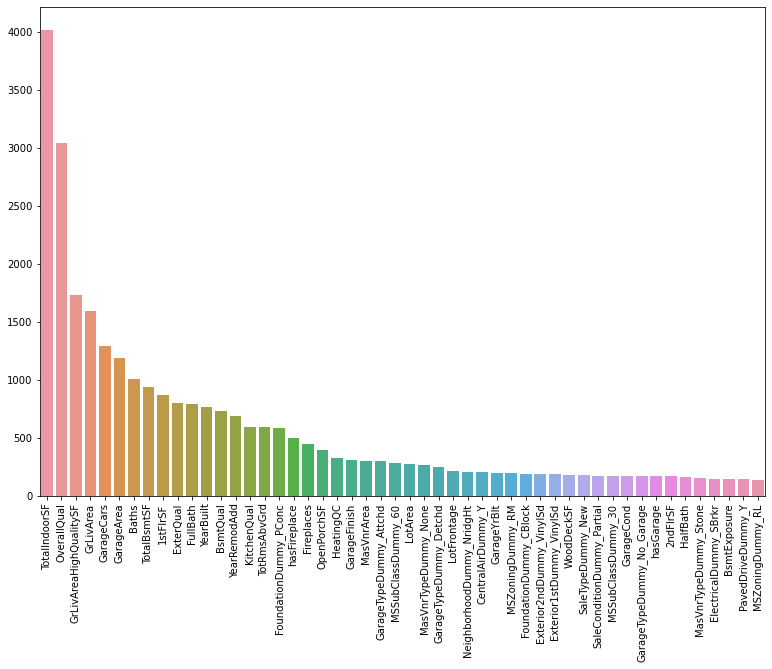

In [22]:
get_k_best(50)

# Correlation Matrix

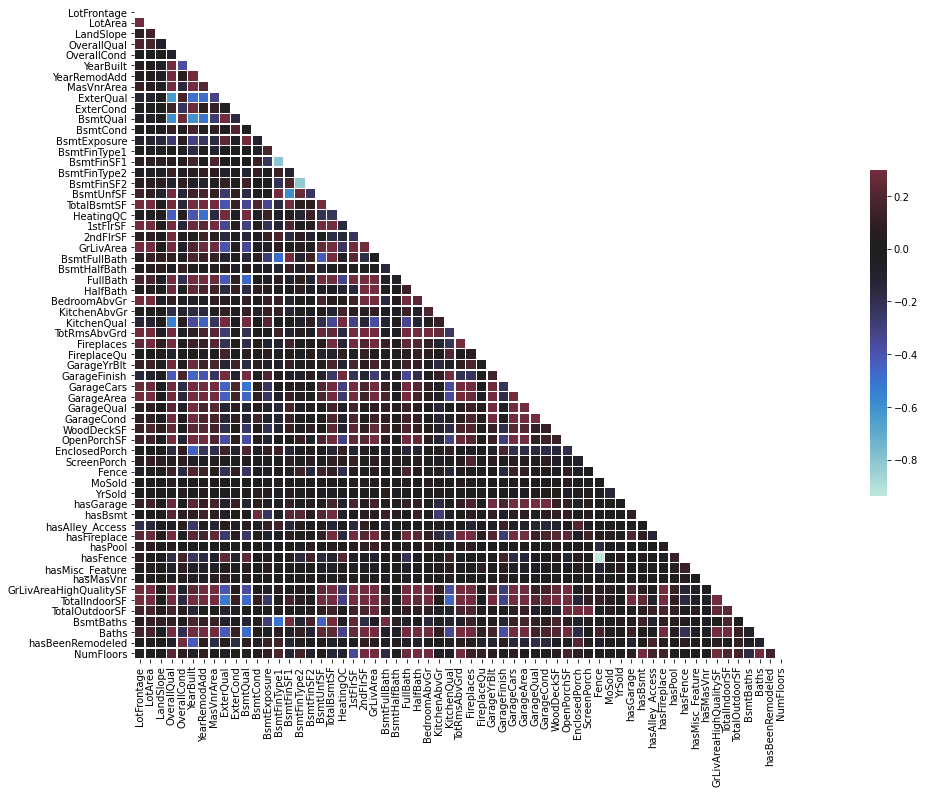

In [23]:
non_dummy_cols = [col for col in X.columns if 'Dummy' not in col]
f, ax = plt.subplots(figsize=(30, 12))
corr = X[non_dummy_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
upper_tri

<ipython-input-24-f910dd4be41c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))


LotFrontage   LotArea  LandSlope  OverallQual  OverallCond  \
LotFrontage               NaN  0.747815   0.064114     0.184021    -0.003698   
LotArea                   NaN       NaN   0.160198     0.178352    -0.004572   
LandSlope                 NaN       NaN        NaN    -0.072165     0.007874   
OverallQual               NaN       NaN        NaN          NaN    -0.094084   
OverallCond               NaN       NaN        NaN          NaN          NaN   
...                       ...       ...        ...          ...          ...   
TotalOutdoorSF            NaN       NaN        NaN          NaN          NaN   
BsmtBaths                 NaN       NaN        NaN          NaN          NaN   
Baths                     NaN       NaN        NaN          NaN          NaN   
hasBeenRemodeled          NaN       NaN        NaN          NaN          NaN   
NumFloors                 NaN       NaN        NaN          NaN          NaN   

                  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  \
LotFrontage        0.058254      0.022672    0.115242  -0.116589   0.008910   
LotArea            0.022825      0.025342    0.060316  -0.101103  -0.008157   
LandSlope         -0.073401     -0.065303   -0.058278   0.011323  -0.001407   
OverallQual        0.571015      0.548553    0.406980  -0.636363   0.136236   
OverallCond       -0.377460      0.071719   -0.153827   0.167443  -0.230671   
...                     ...           ...         ...        ...        ...   
TotalOutdoorSF          NaN           NaN         NaN        NaN        NaN   
BsmtBaths               NaN           NaN         NaN        NaN        NaN   
Baths                   NaN           NaN         NaN        NaN        NaN   
hasBeenRemodeled        NaN           NaN         NaN        NaN        NaN   
NumFloors               NaN           NaN         NaN        NaN        NaN   

                  ...  hasFence  hasMisc_Feature  hasMasVnr  \
LotFrontage       ...  0.074624         0.039207  -0.007115   
LotArea           ...  0.011739         0.042555  -0.023117   
LandSlope         ... -0.032108         0.002215   0.016301   
OverallQual       ... -0.190102        -0.086769  -0.062586   
OverallCond       ...  0.170568         0.075894   0.047000   
...               ...       ...              ...        ...   
TotalOutdoorSF    ...       NaN              NaN        NaN   
BsmtBaths         ...       NaN              NaN        NaN   
Baths             ...       NaN              NaN        NaN   
hasBeenRemodeled  ...       NaN              NaN        NaN   
NumFloors         ...       NaN              NaN        NaN   

                  GrLivAreaHighQualitySF  TotalIndoorSF  TotalOutdoorSF  \
LotFrontage                     0.343814       0.407708        0.148405   
LotArea                         0.383142       0.433811        0.176829   
LandSlope                       0.027119       0.017379        0.020285   
OverallQual                     0.600689       0.711178        0.162551   
OverallCond                    -0.085673      -0.159788        0.057790   
...                                  ...            ...             ...   
TotalOutdoorSF                       NaN            NaN             NaN   
BsmtBaths                            NaN            NaN             NaN   
Baths                                NaN            NaN             NaN   
hasBeenRemodeled                     NaN            NaN             NaN   
NumFloors                            NaN            NaN             NaN   

                  BsmtBaths     Baths  hasBeenRemodeled  NumFloors  
LotFrontage        0.056473  0.161320         -0.009493  -0.056981  
LotArea            0.117456  0.168471          0.031571  -0.031185  
LandSlope          0.103436 -0.049415          0.029816  -0.004907  
OverallQual        0.096692  0.581165         -0.080964   0.226131  
OverallCond       -0.027486 -0.194708          0.311822   0.081516  
...                     ...       ..

In [25]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
mostCorrelatedFeat = get_top_abs_correlations(corr, 500)
mostCorrelatedFeat

Top Absolute Correlations


GrLivArea     GrLivAreaHighQualitySF    0.999213
GarageYrBlt   hasGarage                 0.998342
Fence         hasFence                  0.994792
GarageCars    GarageArea                0.992864
BsmtFullBath  BsmtBaths                 0.990955
                                          ...   
ExterQual     GarageYrBlt               0.471063
2ndFlrSF      TotalIndoorSF             0.469735
TotalBsmtSF   GarageYrBlt               0.469266
ExterQual     GarageQual                0.469187
GarageArea    hasFence                  0.469027
Length: 500, dtype: float64

In [26]:
dropped = set()
for pair in mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9]:
    corr1 = X[pair[0]].corr(y)
    corr2 = X[pair[1]].corr(y)
            
    if abs(corr1) > abs(corr2):
        dropped.add(pair[1])
    else:
        dropped.add(pair[0])

        
mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9]

MultiIndex([(             'GrLivArea', 'GrLivAreaHighQualitySF'),
            (           'GarageYrBlt',              'hasGarage'),
            (                 'Fence',               'hasFence'),
            (            'GarageCars',             'GarageArea'),
            (          'BsmtFullBath',              'BsmtBaths'),
            (            'Fireplaces',           'hasFireplace'),
            (              'FullBath',                  'Baths'),
            (          'BsmtFinType1',             'BsmtFinSF1'),
            (             'GrLivArea',           'TotRmsAbvGrd'),
            (           'OverallQual',              'ExterQual'),
            (          'TotRmsAbvGrd', 'GrLivAreaHighQualitySF'),
            (             'ExterQual',            'KitchenQual'),
            (           'LotFrontage',                'LotArea'),
            (          'BsmtFinType2',             'BsmtFinSF2'),
            (              '2ndFlrSF',              'NumFloors'),
          

In [27]:
allVars = set()
for i in range(len(mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9])):
    for j in range(2):
        allVars.add(mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9][i][j])

In [28]:
allVars

{'1stFlrSF',
 '2ndFlrSF',
 'Baths',
 'BsmtBaths',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtQual',
 'ExterQual',
 'Fence',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageQual',
 'GarageYrBlt',
 'GrLivArea',
 'GrLivAreaHighQualitySF',
 'HeatingQC',
 'KitchenQual',
 'LotArea',
 'LotFrontage',
 'NumFloors',
 'OverallQual',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'TotalIndoorSF',
 'YearBuilt',
 'YearRemodAdd',
 'hasFence',
 'hasFireplace',
 'hasGarage'}

In [29]:
remaining = allVars - dropped
remaining

{'2ndFlrSF',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFullBath',
 'GarageCond',
 'GarageYrBlt',
 'LotArea',
 'TotalBsmtSF',
 'TotalIndoorSF',
 'YearBuilt',
 'hasFence',
 'hasFireplace'}

In [30]:
#X = X.loc[:, X.columns.difference(dropped)]
#X = X.drop(['GarageCars','PoolQC','1stFlrSF','ExterQual','YearRemodAdd'], axis=1)

# Model Training

In [31]:
'''
split_indices = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X, y):
    split_indices.append([train_index, test_index])
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
'''

'\nsplit_indices = []\nkf = KFold(n_splits=5, shuffle=True, random_state=42)\nfor train_index, test_index in kf.split(X, y):\n    split_indices.append([train_index, test_index])\n    print("TRAIN:", len(train_index), "TEST:", len(test_index))\n    X_train, X_test = X.iloc[train_index], X.iloc[test_index]\n    y_train, y_test = y.iloc[train_index], y.iloc[test_index]\n'

In [32]:
scoringOptions = [None, make_scorer(mean_squared_log_error, greater_is_better=False)]
gridScoring = scoringOptions[0]

# Gradient Boosting

In [33]:
model = GradientBoostingRegressor()
params = {'n_estimators': [100,200,300,500],
          'max_depth':[2,3,4,5],
          'max_features':['sqrt'],
          'subsample':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3], 
          'loss':['ls']}

gridGbr = GridSearchCV(model, param_grid=params, cv=5, scoring=gridScoring)
gridGbr.fit(X, y)
print(gridGbr.cv_results_)
print(gridGbr.best_params_)
print(gridGbr.best_score_)

{'mean_fit_time': array([0.0716238 , 0.05991378, 0.0745142 , 0.07542367, 0.07072506,
       0.07705374, 0.05797772, 0.05650949, 0.10755825, 0.13498883,
       0.11486874, 0.11182461, 0.09508643, 0.09121881, 0.08659363,
       0.07932401, 0.13262072, 0.15604186, 0.14862275, 0.148456  ,
       0.14513326, 0.13844285, 0.1295054 , 0.13331919, 0.22726979,
       0.26972914, 0.32063689, 0.32740259, 0.29772224, 0.27151761,
       0.26439996, 0.22123151, 0.06773715, 0.074089  , 0.06871719,
       0.07138619, 0.06306911, 0.06451874, 0.05606985, 0.05410995,
       0.13020887, 0.13808923, 0.12921157, 0.12490468, 0.11774783,
       0.11207972, 0.10391068, 0.09254923, 0.18185153, 0.19984984,
       0.1883224 , 0.17927256, 0.16983967, 0.16218257, 0.15418878,
       0.13819752, 0.28915548, 0.32713447, 0.30238185, 0.35419655,
       0.34573841, 0.30750866, 0.30608573, 0.24364161, 0.08450341,
       0.09086447, 0.09409809, 0.07615027, 0.08257136, 0.0805232 ,
       0.06288624, 0.06505628, 0.17325048, 0

In [34]:
def getFeatureImportance(num, cols, features_importances_, sort):
    
    feature_importances = zip(cols, features_importances_)
    sorted_importance = sorted(list(feature_importances),key= lambda x: abs(x[1]),reverse=False if sort == 'ascending' else True)

    f, ax = plt.subplots(figsize=(13, 9))
    sns.barplot([x[0] for x in sorted_importance[:num]], [x[1] for x in sorted_importance[:num]])
    plt.xticks(rotation=90)
    
    return sorted_importance

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('TotalIndoorSF', 0.10104807505595803),
 ('OverallQual', 0.08624044020075722),
 ('GarageArea', 0.07883090903815573),
 ('FullBath', 0.07069006177578348),
 ('GrLivArea', 0.06526240291771845),
 ('GrLivAreaHighQualitySF', 0.05091120358033373),
 ('ExterQual', 0.049484189118703586),
 ('Baths', 0.03715935723977743),
 ('HeatingQC', 0.03431872014069037),
 ('1stFlrSF', 0.032255683166984184),
 ('OverallCond', 0.022267408771020326),
 ('GarageCars', 0.021633037249877324),
 ('YearBuilt', 0.01913283137129061),
 ('LotArea', 0.019006196129848777),
 ('KitchenQual', 0.017970278607475715),
 ('hasFireplace', 0.017535604279969644),
 ('TotalBsmtSF', 0.01675314521425532),
 ('GarageYrBlt', 0.013373270018797847),
 ('OpenPorchSF', 0.012474472765372238),
 ('YearRemodAdd', 0.01233898500064325),
 ('2ndFlrSF', 0.01220134522866241),
 ('BsmtFinSF1', 0.011667327302230456),
 ('BsmtFinType1', 0.01097507920445609),
 ('CentralAirDummy_Y', 0.00981125765466091),
 ('LotFrontage', 0.009376738338394777),
 ('GarageFinish', 0.00

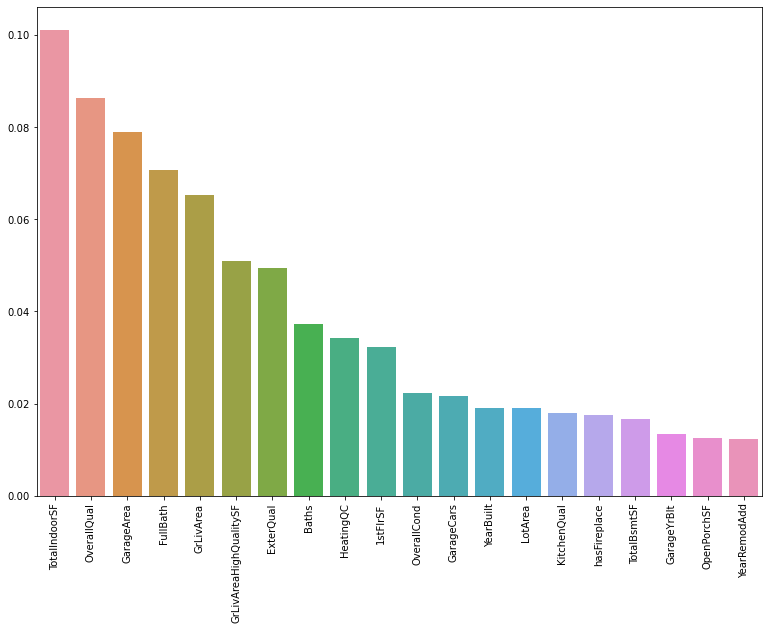

In [35]:
getFeatureImportance(20, X.columns.to_list(), gridGbr.best_estimator_.feature_importances_, sort='descending')

# Evaluating Errors

In [36]:

# train_indices = split_indices[2][0]
# test_indices = split_indices[2][1]
# train_data = X.iloc[test_indices]
# predictions = grid.predict(train_data)
# actuals = y.iloc[test_indices]


In [37]:
# split_results = pd.DataFrame(predictions, actuals).reset_index().rename(columns={'SalePrice':'Predictions',0:'Actuals'})
# split_results['AbsDifference'] = abs(split_results['Predictions'] - split_results['Actuals'])
# split_results['Difference'] = split_results['Predictions'] - split_results['Actuals']
# split_results_sorted = split_results.sort_values(by='AbsDifference', ascending=False)
# split_results_sorted



In [38]:
# train_data = train_data.reset_index()

In [39]:
# train_data_sorted = train_data.iloc[split_results_sorted.index]

In [40]:
# larger_errors = train_data_sorted.iloc[:int(len(train_data_sorted)/2)]
# smaller_errors = train_data_sorted.iloc[int(len(train_data_sorted)/2):]

In [41]:
# larger_errors.mean()[['TotalIndoorSF','OverallQual']]

In [42]:
# smaller_errors.mean()[['TotalIndoorSF','OverallQual']]

In [43]:
# split_results_sorted.iloc[:int(len(split_results_sorted)/2)]['Actuals'].mean()

In [44]:
# split_results_sorted.iloc[int(len(split_results_sorted)/2):]['Actuals'].mean()

In [45]:
# larger_errors.iloc[0,:60] - train_data_sorted.mean()[:60]

In [46]:
# split_results_sorted.head(50)

# Ridge Regression

In [47]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(trained.loc[:, trained.columns != 'SalePrice'])
X_Scaled = pd.DataFrame(X_Scaled, columns = trained.columns[trained.columns != 'SalePrice'])

In [48]:
model = Ridge()
params = {'alpha':[0.1,1,10,50,75,100,1000,2000]}
gridRidge = GridSearchCV(model, param_grid=params, cv=5, scoring=gridScoring)
gridRidge.fit(X_Scaled, y)
print(gridRidge.cv_results_)
print(gridRidge.best_params_)
print(gridRidge.best_score_)

{'mean_fit_time': array([0.04982738, 0.00530844, 0.00553937, 0.00515714, 0.00509114,
       0.00531015, 0.00514026, 0.00551805]), 'std_fit_time': array([8.89904906e-02, 1.06259970e-04, 1.92110016e-04, 4.80290511e-04,
       1.20736958e-04, 2.74277131e-05, 4.25487127e-04, 4.78927859e-04]), 'mean_score_time': array([0.00277934, 0.00286975, 0.00289021, 0.0028254 , 0.00274668,
       0.00280046, 0.00269704, 0.00292096]), 'std_score_time': array([1.53994677e-04, 9.68378201e-05, 1.11925840e-04, 4.28935101e-05,
       4.07523124e-05, 5.90421841e-05, 3.47543259e-04, 2.77290652e-04]), 'param_alpha': masked_array(data=[0.1, 1, 10, 50, 75, 100, 1000, 2000],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.1}, {'alpha': 1}, {'alpha': 10}, {'alpha': 50}, {'alpha': 75}, {'alpha': 100}, {'alpha': 1000}, {'alpha': 2000}], 'split0_test_score': array([0.91499658, 0.91612869, 0.91763772, 0.9167234 , 0.9166

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('LotFrontage', 0.0),
 ('YearBuilt', 0.0),
 ('GrLivArea', 2.7140512059986577e-12),
 ('MasVnrArea', 2.019471256886618e-10),
 ('ElectricalDummy_FuseF', 4.2153747159545674e-10),
 ('SaleConditionDummy_Partial', 1.9273511675521604e-09),
 ('NeighborhoodDummy_Timber', 4.884802708771119e-06),
 ('BsmtQual', 1.3528532993190012e-05),
 ('NeighborhoodDummy_Edwards', 3.344830880891436e-05),
 ('OpenPorchSF', 5.622140899186334e-05),
 ('TotRmsAbvGrd', 0.0001344860941159265),
 ('YearRemodAdd', 0.0001654715344594493),
 ('BsmtCond', 0.0003465287503392478),
 ('MSSubClassDummy_40', 0.00044559784291298143),
 ('TotalBsmtSF', 0.0005146051811515395),
 ('Condition1Dummy_PosA', 0.0006590668185080251),
 ('Exterior1stDummy_CBlock', 0.0016682453671650332),
 ('NeighborhoodDummy_OldTown', 0.002040859871739631),
 ('FunctionalDummy_Min1', 0.0038642356452700533),
 ('FoundationDummy_Slab', 0.004360081667851512),
 ('NeighborhoodDummy_Mitchel', 0.004432551298069631),
 ('KitchenQual', 0.006275852095936951),
 ('GarageTypeDum

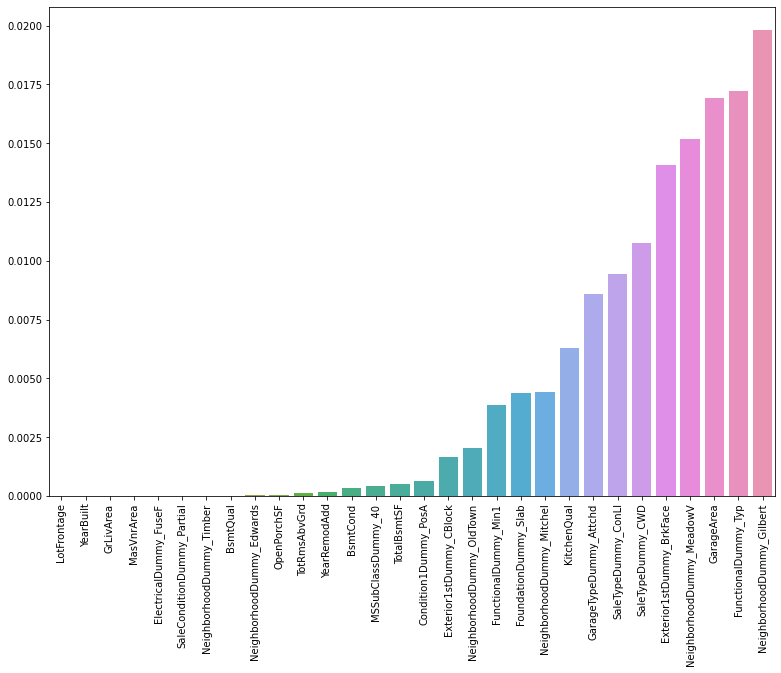

In [49]:
pvals = stats.coef_pval(gridRidge.best_estimator_, X_Scaled, y)
pvals_sorted = getFeatureImportance(30, X_Scaled.columns, pvals, sort='ascending')
pvals_sorted

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('OverallQual', 0.05685466577446354),
 ('OverallCond', 0.039340296307959176),
 ('GrLivArea', 0.037715670968490926),
 ('TotalBsmtSF', 0.035562645360735994),
 ('TotalIndoorSF', 0.03437855748114743),
 ('1stFlrSF', 0.03337073982007679),
 ('LotArea', 0.032932765517685245),
 ('YearBuilt', 0.031025249745359314),
 ('SaleConditionDummy_Normal', 0.025532015033860125),
 ('GrLivAreaHighQualitySF', 0.025055989204266067),
 ('MSZoningDummy_RL', 0.024815566732617728),
 ('CentralAirDummy_Y', 0.02116098563201969),
 ('YearRemodAdd', 0.0199321533259488),
 ('MSZoningDummy_RM', 0.018407406597276525),
 ('MSZoningDummy_FV', 0.01785072314395354),
 ('SaleTypeDummy_New', 0.01764203078978969),
 ('NeighborhoodDummy_Crawfor', 0.017379716743775565),
 ('FunctionalDummy_Typ', 0.016786621978010133),
 ('Condition1Dummy_Norm', 0.01674187308842402),
 ('2ndFlrSF', 0.01586428997943155),
 ('FoundationDummy_PConc', 0.015627278661907374),
 ('BsmtUnfSF', -0.015604379615003825),
 ('NeighborhoodDummy_StoneBr', 0.0151311531066991

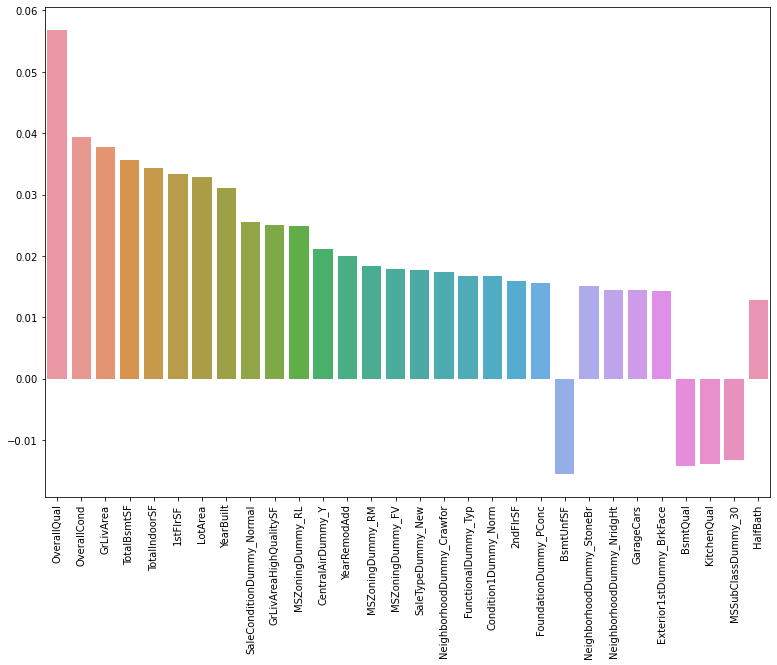

In [50]:
coefMagSorted = getFeatureImportance(30, X_Scaled.columns, gridRidge.best_estimator_.coef_, sort='descending')
coefMagSorted

In [51]:
#col_subset = [val[0] for val in pvals_sorted if val[1] < 0.05]
col_subset = [val[0] for val in coefMagSorted[:51]]
gridRidge = GridSearchCV(model, param_grid=params, cv=5, scoring=gridScoring)
gridRidge.fit(X_Scaled[col_subset], y)
print(gridRidge.cv_results_)
print(gridRidge.best_params_)
print(gridRidge.best_score_)

{'mean_fit_time': array([0.00331483, 0.0025928 , 0.00227318, 0.0023109 , 0.00226412,
       0.00225377, 0.00223055, 0.00232172]), 'std_fit_time': array([3.71755215e-04, 3.17497681e-04, 1.10864383e-05, 4.41169986e-05,
       2.36213019e-05, 3.54194051e-05, 8.74937846e-05, 6.54113875e-05]), 'mean_score_time': array([0.00191088, 0.00157046, 0.00144958, 0.00145216, 0.00144248,
       0.00146084, 0.00947299, 0.00147376]), 'std_score_time': array([1.20949950e-04, 1.62611679e-04, 1.16009689e-05, 1.26351950e-05,
       1.38671919e-05, 1.89763217e-05, 1.60830019e-02, 7.68786023e-05]), 'param_alpha': masked_array(data=[0.1, 1, 10, 50, 75, 100, 1000, 2000],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.1}, {'alpha': 1}, {'alpha': 10}, {'alpha': 50}, {'alpha': 75}, {'alpha': 100}, {'alpha': 1000}, {'alpha': 2000}], 'split0_test_score': array([0.92837204, 0.929129  , 0.93011644, 0.92941701, 0.9293

In [52]:
stats.summary(gridRidge.best_estimator_, X_Scaled[col_subset], y)

Residuals:
    Min      1Q  Median      3Q     Max
-0.4511 -0.0537 -0.0008  0.0497  0.7221


Coefficients:
             Estimate               Std. Error                t value   p value
_intercept  12.022424       0.002665+0.000000j  4510.658500+0.000000j  0.000000
x1           0.067570       0.005115-0.000000j    13.210600+0.000000j  0.000000
x2           0.042286       0.003347+0.000000j    12.634600-0.000000j  0.000000
x3           0.058927       0.016006+0.000000j     3.681700+0.000000j  0.000240
x4          -0.019483       0.011807+0.000000j    -1.650100+0.000000j  0.099141
x5           0.195320       0.046984-0.000000j     4.157200+0.000000j  0.000034
x6           0.073926       0.010444+0.000000j     7.078700-0.000000j  0.000000
x7           0.039782       0.003604+0.000000j    11.038900+0.000000j  0.000000
x8           0.040791       0.006519+0.000000j     6.257700+0.000000j  0.000000
x9           0.022928       0.003468-0.000000j     6.612100+0.000000j  0.000000
x10         -

# Lasso Regression

In [53]:
model = Lasso()
params = {'alpha':[0.005,0.006,0.0007,0.0008,0.001,0.01,0.1,1,10]}
gridLasso = GridSearchCV(model, param_grid=params, cv=5, scoring=gridScoring)
gridLasso.fit(X_Scaled, y)
print(gridLasso.cv_results_)
print(gridLasso.best_params_)
print(gridLasso.best_score_)

{'mean_fit_time': array([0.02169137, 0.01342812, 0.04515443, 0.04620504, 0.04293938,
       0.011553  , 0.00593514, 0.00499783, 0.00473161]), 'std_fit_time': array([0.00904861, 0.00172673, 0.02088241, 0.01543046, 0.00481292,
       0.00186348, 0.00018646, 0.00027006, 0.00055957]), 'mean_score_time': array([0.00372024, 0.00282087, 0.0028151 , 0.0028791 , 0.00286465,
       0.00281663, 0.00284967, 0.00296721, 0.00275364]), 'std_score_time': array([5.50408598e-04, 1.86938205e-04, 1.54777963e-04, 1.92890939e-04,
       1.43944684e-04, 8.47302733e-05, 2.48731608e-04, 3.49476474e-04,
       2.18942760e-04]), 'param_alpha': masked_array(data=[0.005, 0.006, 0.0007, 0.0008, 0.001, 0.01, 0.1, 1, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.005}, {'alpha': 0.006}, {'alpha': 0.0007}, {'alpha': 0.0008}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('LotFrontage', 0.0),
 ('YearBuilt', 0.0),
 ('MSZoningDummy_RL', 3.2862601528904634e-14),
 ('MSZoningDummy_RH', 3.930189507173054e-14),
 ('AlleyDummy_No_Alley_Access', 1.0582645870726992e-12),
 ('MSZoningDummy_RM', 1.1164402735630574e-12),
 ('TotRmsAbvGrd', 3.452793606584237e-11),
 ('SaleConditionDummy_Partial', 2.0927570787421246e-10),
 ('LandSlope', 5.382521628405357e-08),
 ('YearRemodAdd', 1.7651470285429127e-07),
 ('ElectricalDummy_FuseF', 2.2772760388534152e-07),
 ('NeighborhoodDummy_Edwards', 2.2680748736902956e-06),
 ('TotalBsmtSF', 4.346772245700237e-06),
 ('NeighborhoodDummy_Timber', 1.3001358277309194e-05),
 ('BsmtFullBath', 9.046693268466299e-05),
 ('OpenPorchSF', 0.00010801848235209022),
 ('Condition1Dummy_PosA', 0.0003037414327993204),
 ('MSSubClassDummy_40', 0.0016865529985525818),
 ('GarageTypeDummy_Attchd', 0.0018116393158675859),
 ('SaleTypeDummy_ConLI', 0.0019932817373493616),
 ('Exterior1stDummy_CBlock', 0.0020407023840072203),
 ('NeighborhoodDummy_OldTown', 0.00245

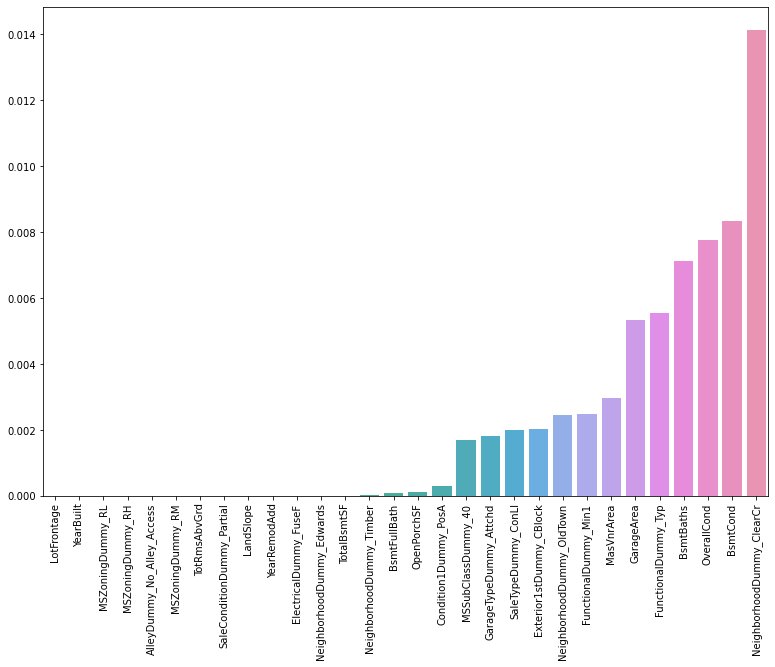

In [54]:
pvals = stats.coef_pval(gridLasso.best_estimator_, X_Scaled, y)
pvals_sorted = getFeatureImportance(30, X_Scaled.columns, pvals, sort='ascending')
pvals_sorted

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[('MSZoningDummy_RL', 0.09722849547514117),
 ('GrLivArea', 0.08236643596018489),
 ('MSZoningDummy_RM', 0.07443194529093948),
 ('OverallQual', 0.06536244716774632),
 ('MSZoningDummy_FV', 0.056456411171134556),
 ('YearBuilt', 0.05202277658221302),
 ('TotalBsmtSF', 0.04671830337825225),
 ('OverallCond', 0.04399318767623792),
 ('LotArea', 0.0400909756256496),
 ('TotalIndoorSF', 0.034803557963805326),
 ('SaleTypeDummy_New', 0.031013412869122344),
 ('1stFlrSF', 0.028357445489474865),
 ('BsmtUnfSF', -0.027767979805681513),
 ('MSZoningDummy_RH', 0.026148648555725476),
 ('SaleConditionDummy_Normal', 0.02598670575194129),
 ('NeighborhoodDummy_Crawfor', 0.019239187842324847),
 ('FunctionalDummy_Typ', 0.01864008615632783),
 ('CentralAirDummy_Y', 0.018365829133297113),
 ('GarageCars', 0.01770372230960098),
 ('Condition1Dummy_Norm', 0.0173947574898701),
 ('YearRemodAdd', 0.01644371879828335),
 ('NeighborhoodDummy_StoneBr', 0.014001213407091494),
 ('NeighborhoodDummy_NridgHt', 0.013988176864932944),


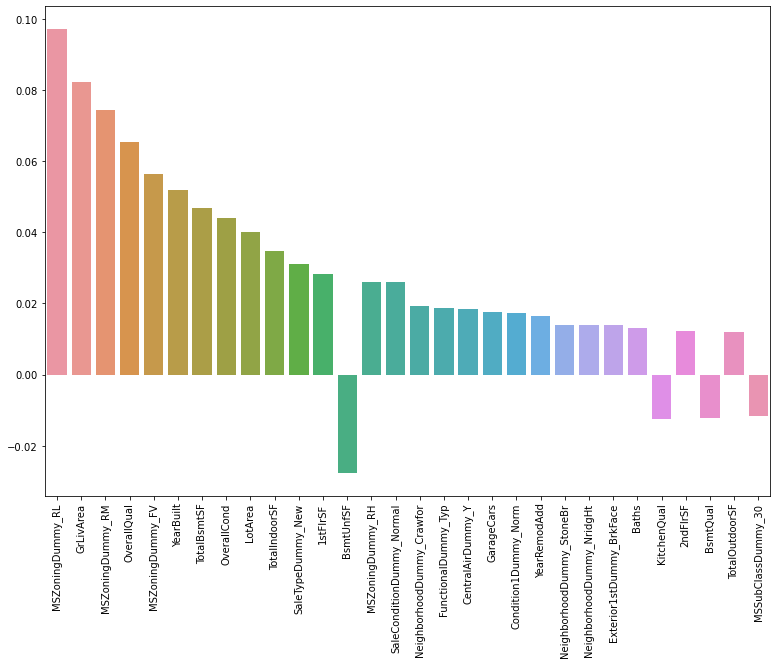

In [55]:
coefMagSorted = getFeatureImportance(30, X_Scaled.columns, gridLasso.best_estimator_.coef_, sort='descending')
coefMagSorted

In [56]:
stats.summary(gridLasso.best_estimator_, X_Scaled, y)

Residuals:
    Min      1Q  Median      3Q     Max
-0.4754 -0.0522 -0.0008  0.0469  0.6726


Coefficients:
             Estimate                  Std. Error                t value   p value
_intercept  12.022424  4.564000e-03+8.000000e-06j  2634.415100-4.839300j  0.000000
x1           0.003184  6.088000e-03+4.880000e-04j     0.519600-0.041700j  0.602235
x2           0.040091  3.823000e-03+6.258000e-03j     2.850200-4.665200j  0.000000
x3          -0.000000  6.133000e-03+1.063000e-03j     0.000000+0.000000j  1.000000
x4           0.065362  1.608800e-02+1.850200e-02j     1.749300-2.011700j  0.007765
x5           0.043993  2.579000e-03+4.860000e-04j    16.471700-3.102200j  0.000000
x6           0.052023  9.784000e-03-1.589000e-03j     5.180200+0.841400j  0.000000
x7           0.016444  5.523000e-03-6.000000e-06j     2.977300+0.003100j  0.002956
x8           0.000000  1.073200e-02+5.400000e-05j     0.000000+0.000000j  1.000000
x9          -0.005576  3.050000e-03-3.860000e-04j    -1.799200-

# SVR

In [57]:
model = SVR()
params = {'kernel':['linear'],'C':[0.01,0.1],'epsilon':[0.001,0.01,0.1,1]}
gridSVR = GridSearchCV(model, param_grid=params, cv=5, scoring=gridScoring)
gridSVR.fit(X_Scaled, y)
print(gridSVR.cv_results_)
print(gridSVR.best_params_)
print(gridSVR.best_score_)

{'mean_fit_time': array([0.47092934, 0.40811982, 0.14837666, 0.00690045, 2.3016767 ,
       2.27747116, 1.05673604, 0.00687881]), 'std_fit_time': array([0.03470884, 0.02250387, 0.00251139, 0.00163894, 0.3157714 ,
       0.31219771, 0.27579676, 0.00036147]), 'mean_score_time': array([0.05981359, 0.05426574, 0.01875291, 0.00283551, 0.08045664,
       0.06679201, 0.02301316, 0.00323682]), 'std_score_time': array([0.00107247, 0.00333412, 0.00083398, 0.00036132, 0.00917712,
       0.00919447, 0.00328328, 0.00014572]), 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.1],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_epsilon': masked_array(data=[0.001, 0.01, 0.1, 1, 0.001, 0.01, 0.1, 1],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['linear', 'linear', 'linear', 'linear', 

# Predictions on Test Set

In [58]:
tested_scaled = scaler.transform(tested)
tested_scaled = pd.DataFrame(tested_scaled, columns = tested.columns)

gbr_predictions = gridGbr.predict(tested)
ridge_predictions = gridRidge.predict(tested_scaled[col_subset])
lasso_predictions = gridLasso.predict(tested_scaled)
svr_predictions = gridSVR.predict(tested_scaled)

gbr_predictions = pd.Series(np.exp(np.array(gbr_predictions)))
ridge_predictions = pd.Series(np.exp(np.array(ridge_predictions)))
lasso_predictions = pd.Series(np.exp(np.array(lasso_predictions)))
svr_predictions = pd.Series(np.exp(np.array(svr_predictions)))

results = pd.concat([tested.reset_index()['Id'], pd.concat([gbr_predictions, ridge_predictions, lasso_predictions, svr_predictions], axis=1)],axis=1)

final_pred_log_avg = np.exp((np.log(results[0]) + np.log(results[1]) + np.log(results[2]) + np.log(results[3]))/4)
final_pred_log_avg = pd.DataFrame(final_pred_log_avg, columns=['SalePrice'])
final_pred_avg = (results[0] + results[1] + results[2] + results[3])/4
final_pred_avg = pd.DataFrame(final_pred_avg, columns=['SalePrice'])

results = pd.concat([results, final_pred_log_avg],axis=1)

# Stacking Model

In [61]:
level0 = []
level0.append(('gbr',gridGbr))
level0.append(('ridge',gridRidge))
level0.append(('lasso',gridLasso))
level0.append(('svr',gridSVR))
level1 = Ridge()
model = StackingRegressor(estimators=level0, final_estimator=level1)

In [63]:
params = {}
gridStacking = GridSearchCV(model, param_grid=params, cv=5, scoring=gridScoring)
gridStacking.fit(X_Scaled, y)
print(gridStacking.cv_results_)
print(gridStacking.best_params_)
print(gridStacking.best_score_)

KeyboardInterrupt: 

In [ ]:
stacking_predictions = pd.DataFrame(gridStacking.predict(tested_scaled), columns=['SalePrice'])
results_stacking = pd.concat([tested['Id'], stacking_predictions], axis=1)

# Submission

In [ ]:
#results

In [ ]:
#results[['Id','SalePrice']].to_csv('submission10.csv', index=False)

In [ ]:
results_stacking

In [ ]:
results_stacking[['Id','SalePrice']].to_csv('submission10.csv', index=False)